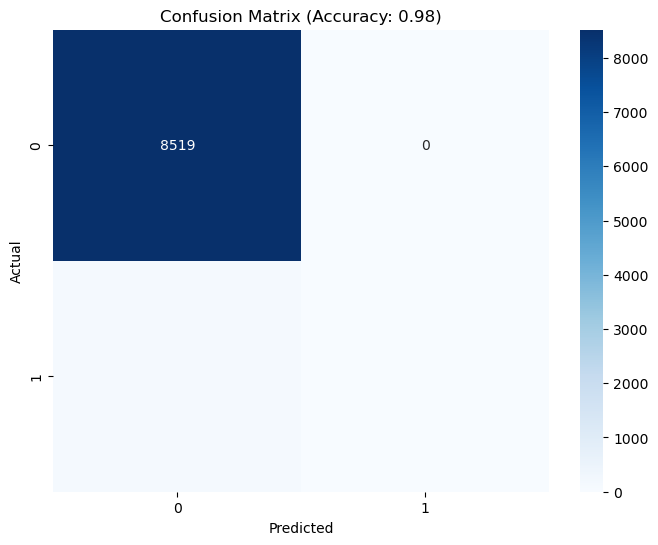

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("dataset.csv")

from sklearn.impute import SimpleImputer

# For numerical features
numerical_cols = data.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# For categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])


# Convert categorical columns to numerical values (e.g., 'gender')
data = pd.get_dummies(data, drop_first=True)

# Separate the dependent variable (e.g., stroke) from the independent variables
X = data.drop('stroke', axis=1)  # Independent variables
Y = data['stroke']               # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Logistic Regression model on the PCA-transformed data
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, Y_train)

# Predict the labels for the test set
Y_pred = classifier.predict(X_test_pca)

# Calculate and display the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])  # Adjust labels accordingly
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()


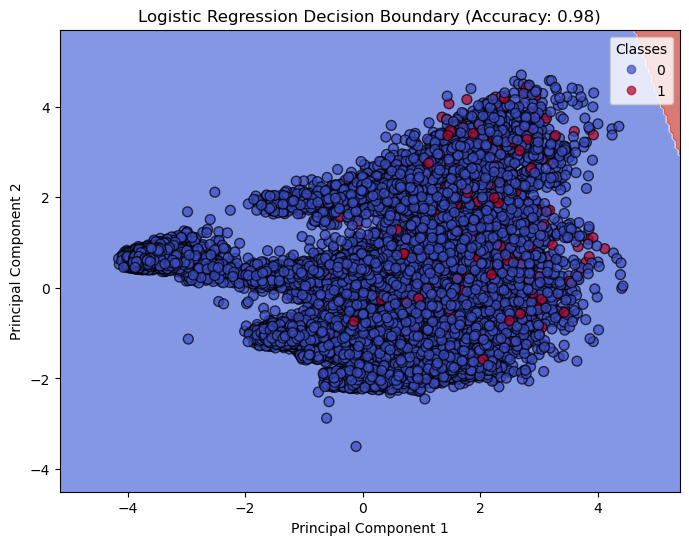

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a mesh grid with a larger step size to reduce points
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the classification for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)

# Scatter plot of the PCA-transformed training data with smaller, transparent points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, edgecolors='k', s=50, cmap=plt.cm.coolwarm, alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Logistic Regression Decision Boundary (Accuracy: {accuracy:.2f})")

# Adjust legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


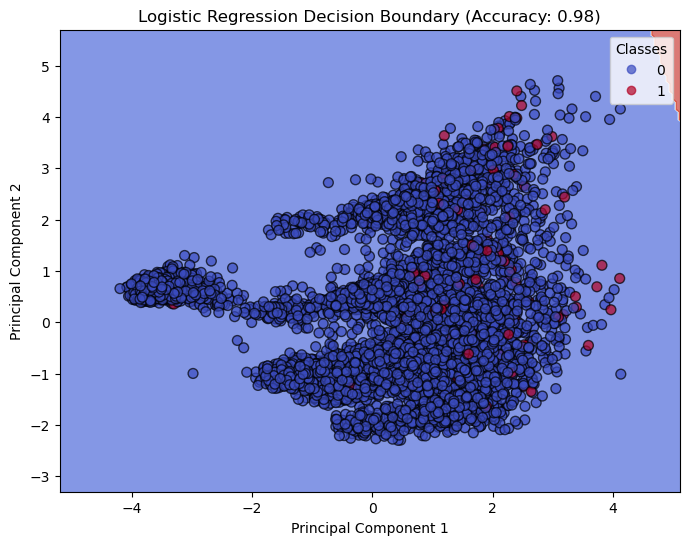

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a mesh grid with a larger step size to reduce points
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the classification for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)

# Scatter plot of the PCA-transformed test data with smaller, transparent points
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, edgecolors='k', s=50, cmap=plt.cm.coolwarm, alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Logistic Regression Decision Boundary (Accuracy: {accuracy:.2f})")

# Adjust legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [8]:
# After training your model
Y_pred = classifier.predict(X_test_pca)  # Make predictions on the test set

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)  # Calculate accuracy

# Print the accuracy
print(f"Model Accuracy: {accuracy:.2f}")  # Display the accuracy


Model Accuracy: 0.98


In [9]:
data.shape

(43400, 17)